<a href="https://www.kaggle.com/code/shubhammisar/fruit-prediction-cnn-pytorch-resnet-18" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input/'):
#     print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import zipfile
zip_ref = zipfile.ZipFile('Data/train.zip','r')
zip_ref.extractall('Data/')
zip_ref.close ()

In [5]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import transforms

In [6]:
transform1 = transforms.Compose([
    transforms.Resize(255),
    transforms.ToTensor()
])

In [7]:
transform2 = transforms.Compose([
    transforms.Resize(255),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.5)
])

In [8]:
transform3 = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.Resize(255),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.RandomErasing(p=0.5),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1)
])

In [9]:
train_data2= ImageFolder('Data/train/train',transform = transform2)

In [10]:
train_data1= ImageFolder('Data/train/train',transform = transform1)

In [11]:
train_data3 = ImageFolder('Data/train/train',transform = transform3)

In [196]:
import torch
from torch.utils.data import random_split

In [197]:
classes = train_data1.classes

In [198]:
len(classes)

33

In [199]:
from collections import Counter

In [200]:
counts = dict(Counter(train_data1.targets))

In [201]:
counts.values()

dict_values([492, 492, 492, 427, 490, 462, 490, 492, 492, 490, 450, 392, 984, 466, 492, 490, 490, 438, 479, 492, 490, 492, 696, 444, 666, 490, 447, 492, 450, 490, 492, 738, 475])

In [202]:
classes_values = dict(zip(classes, counts.values()))

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

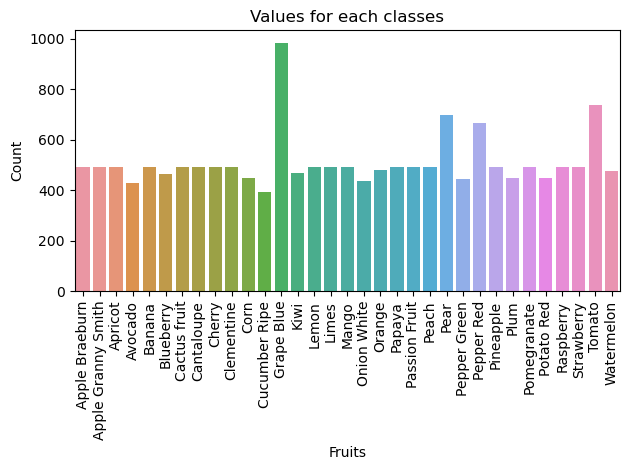

In [204]:
sns.barplot(x = list(classes_values.keys()), y = list(classes_values.values()))
plt.ylabel("Count")
plt.xlabel("Fruits")
plt.title("Values for each classes")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [205]:
classes_list = list(counts.keys())

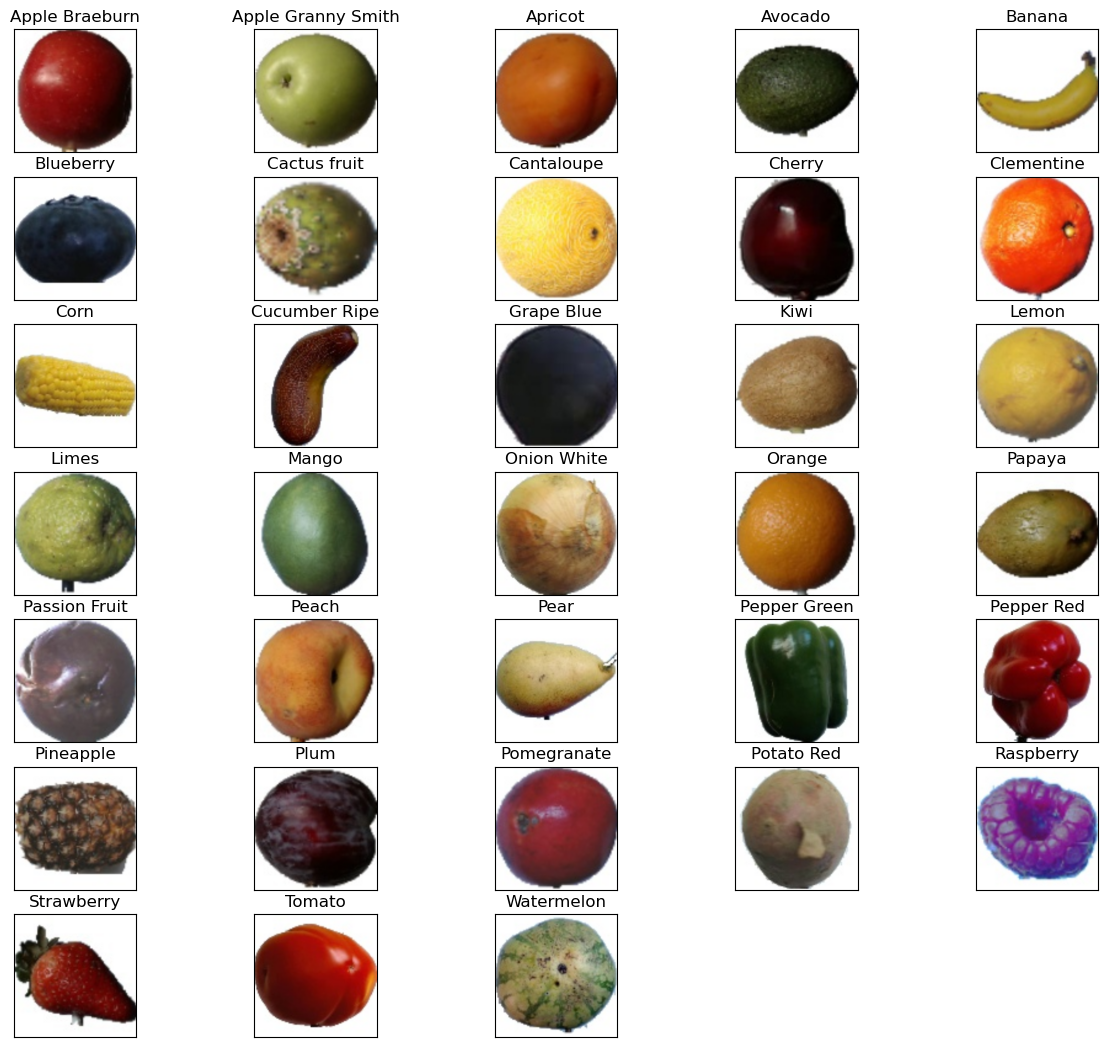

In [206]:
fig = plt.figure(figsize=(15, 15))
rows = 8
columns = 5
count = 1
for img, label in train_data1:
    if label in classes_list:
        fig.add_subplot(rows, columns, count)
        plt.title(classes[label])
        plt.imshow(img.permute(1,2,0))
        classes_list.remove(label)
        plt.xticks([])
        plt.yticks([])
        count = count + 1
plt.show()

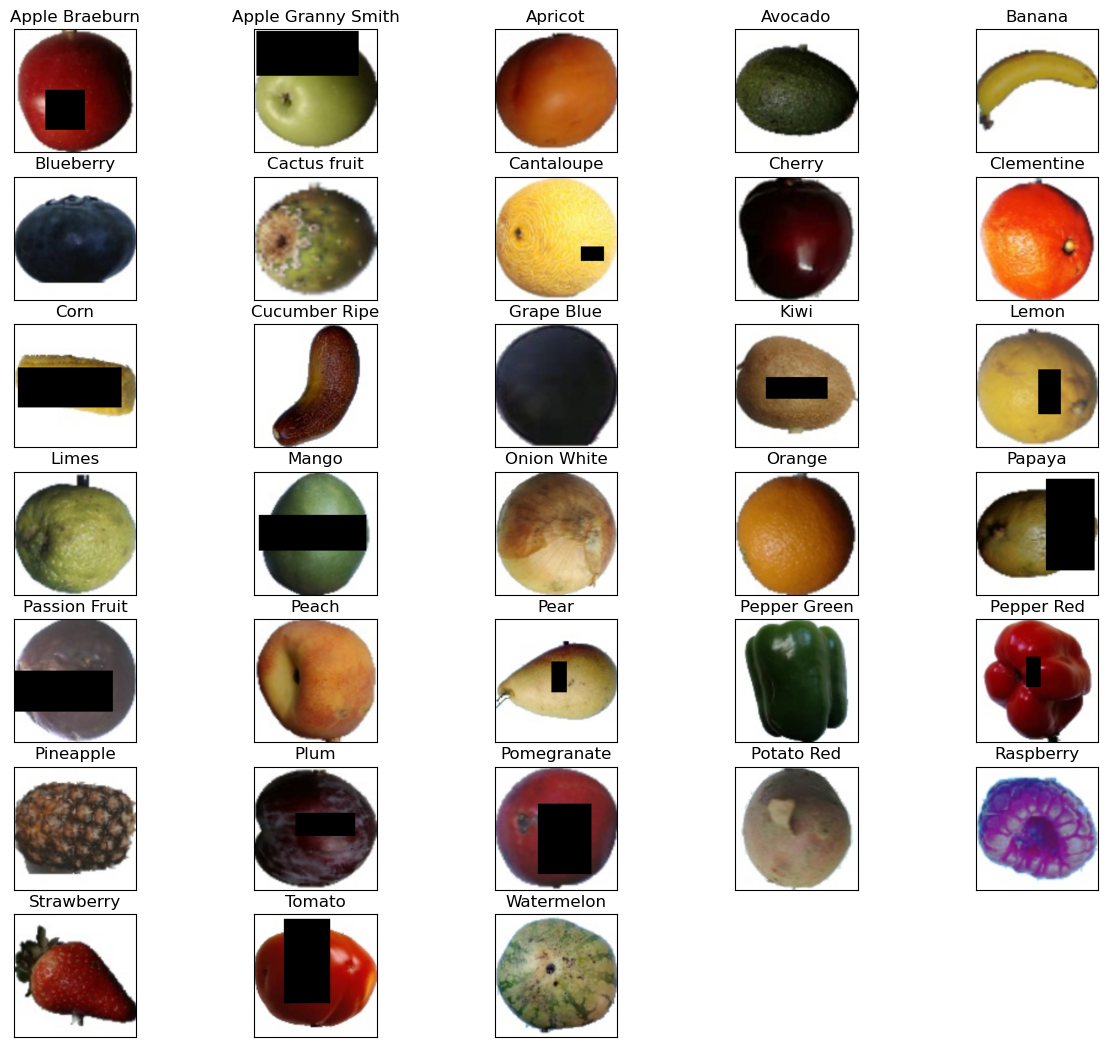

In [207]:
classes_list = list(counts.keys())
fig = plt.figure(figsize=(15, 15))
rows = 8
columns = 5
count = 1
for img, label in train_data2:
    if label in classes_list:
        fig.add_subplot(rows, columns, count)
        plt.title(classes[label])
        plt.imshow(img.permute(1,2,0))
        classes_list.remove(label)
        plt.xticks([])
        plt.yticks([])
        count = count + 1
plt.show()

In [208]:
# classes_list = list(counts.keys())
# fig = plt.figure(figsize=(15, 15))
# rows = 8
# columns = 5
# count = 1
# for img, label in train_data3:
#     if label in classes_list:
#         fig.add_subplot(rows, columns, count)
#         plt.title(classes[label])
#         plt.imshow(img.permute(1,2,0))
#         classes_list.remove(label)
#         plt.xticks([])
#         plt.yticks([])
#         count = count + 1
# plt.show()

In [209]:
train_ratio = 0.8  
dataset_size = len(train_data1)
train_size = int(train_ratio * dataset_size)
test_size = dataset_size - train_size

train_data1, test_data = random_split(train_data1, [train_size, test_size])

In [210]:
train_data = torch.utils.data.ConcatDataset([train_data2, train_data1])

## DataLoader

In [211]:
import torch
import tqdm

In [219]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True, num_workers=2)

## Model Architecture

In [220]:
import torch
import torch.nn as nn

class CNNModel(nn.Module):
    def __init__(self, num_classes=33):
        super(CNNModel, self).__init__()

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten = nn.Flatten()

        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.relu4 = nn.ReLU()

        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)

        out = self.conv2(out)
        out = self.relu2(out)
        out = self.maxpool2(out)

        out = self.conv3(out)
        out = self.relu3(out)
        out = self.maxpool3(out)

        out = self.flatten(out)

        out = self.fc1(out)
        out = self.relu4(out)

        out = self.fc2(out)

        return out

model = CNNModel()

In [221]:
import torch.nn.parallel as parallel

In [222]:
if torch.cuda.device_count() > 1:
    print("Using", torch.cuda.device_count(), "GPUs!")
    model = parallel.DataParallel(model)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Using 2 GPUs!


DataParallel(
  (module): CNNModel(
    (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu1): ReLU()
    (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu2): ReLU()
    (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu3): ReLU()
    (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (fc1): Linear(in_features=65536, out_features=128, bias=True)
    (relu4): ReLU()
    (fc2): Linear(in_features=128, out_features=33, bias=True)
  )
)

## Training

In [223]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(resnet18.parameters(), lr =  0.001)

In [224]:
from tqdm import tqdm

In [225]:
train_accuracies = []
test_accuracies = []
num_epochs = 5
for epoch in range(num_epochs):
    # Training
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in tqdm(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = resnet18(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track train loss and accuracy
        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    # Calculate train accuracy and loss
    train_accuracy = correct_train / total_train
    train_loss = train_loss / total_train
    
    train_accuracies.append(train_accuracy)
    # Evaluation (Test)
    test_loss = 0.0
    correct_test = 0
    total_test = 0
    all_predictions = []
    all_targets = []
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = resnet18(images)
            loss = criterion(outputs, labels)

            # Track test loss and accuracy
            test_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
            all_predictions.extend(predicted.cpu().numpy())
            all_targets.extend(labels.cpu().numpy())

    # Calculate test accuracy and loss
    test_accuracy = correct_test / total_test
    test_loss = test_loss / total_test
    
    test_accuracies.append(test_accuracy)

    # Print epoch results
    print(f"Epoch {epoch+1}/{num_epochs} - Train Loss: {train_loss:.4f} - Train Acc: {train_accuracy:.4f} - Test Loss: {test_loss:.4f} - Test Acc: {test_accuracy:.4f}")

100%|██████████| 475/475 [01:42<00:00,  4.61it/s]


Epoch 1/5 - Train Loss: 0.0061 - Train Acc: 0.9992 - Test Loss: 0.0054 - Test Acc: 0.9991


100%|██████████| 475/475 [01:42<00:00,  4.64it/s]


Epoch 2/5 - Train Loss: 0.0055 - Train Acc: 0.9995 - Test Loss: 0.0026 - Test Acc: 1.0000


100%|██████████| 475/475 [01:44<00:00,  4.54it/s]


Epoch 3/5 - Train Loss: 0.0047 - Train Acc: 0.9996 - Test Loss: 0.0026 - Test Acc: 0.9997


100%|██████████| 475/475 [01:47<00:00,  4.42it/s]


Epoch 4/5 - Train Loss: 0.0050 - Train Acc: 0.9996 - Test Loss: 0.0021 - Test Acc: 0.9997


100%|██████████| 475/475 [01:46<00:00,  4.46it/s]


Epoch 5/5 - Train Loss: 0.0051 - Train Acc: 0.9995 - Test Loss: 0.0021 - Test Acc: 1.0000


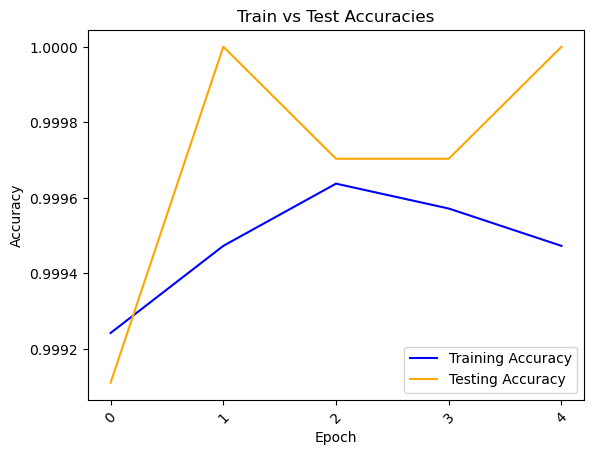

In [232]:
sns.lineplot(x = range(5), y = train_accuracies, color = "blue", label = "Training Accuracy")
sns.lineplot(x = range(5), y = test_accuracies, color = "orange", label = "Testing Accuracy")
plt.title("Train vs Test Accuracies")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks(range(0,5), rotation = 45)
plt.yticks(label = range(0,1))
plt.legend()
plt.show()

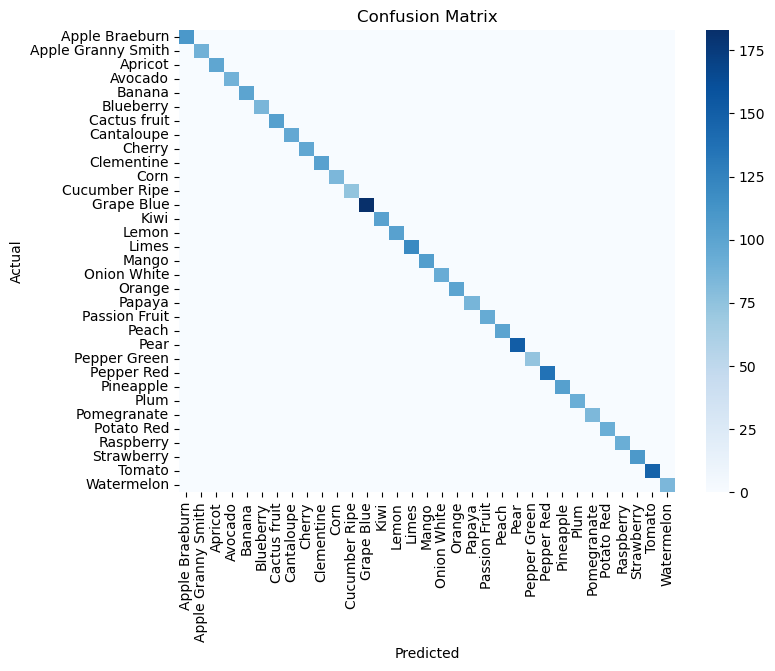

In [234]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(all_targets, all_predictions)
labels = train_data2.classes
plt.figure(figsize=(8, 6))
sns.heatmap(cm, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()